In [61]:
from numpy import *
import random as rand
import operator
from os import listdir

In [2]:
random.rand(4,4)

array([[0.67649939, 0.18690864, 0.69675691, 0.47533736],
       [0.22653638, 0.77960437, 0.11401776, 0.25623241],
       [0.85709414, 0.38196042, 0.28330567, 0.63938297],
       [0.67892335, 0.40224788, 0.29338147, 0.47153958]])

In [3]:
randmat = mat(random.rand(4, 4))

In [4]:
randmat.I

matrix([[ 1.95214761, -2.42157188, -2.24456192,  4.12531572],
        [ 0.58869156, -2.44441177,  0.531979  ,  2.9344153 ],
        [-3.14256148,  4.35386487,  2.61506028, -4.66961302],
        [ 0.90719833,  0.65376722,  0.60048916, -1.44212726]])

In [5]:
invrandmat = randmat.I

In [6]:
randmat*invrandmat

matrix([[ 1.00000000e+00, -1.08991326e-16, -2.86508455e-17,
          1.16043693e-16],
        [ 7.72916325e-17,  1.00000000e+00, -2.15544114e-16,
          2.43330783e-16],
        [ 1.24889768e-16, -7.59832058e-17,  1.00000000e+00,
          2.15039438e-17],
        [-1.09504652e-17, -5.03408780e-17, -3.18968288e-17,
          1.00000000e+00]])

In [7]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    lables = ['A', 'A', 'B', 'B']
    return group, lables


In [8]:
group, lables = createDataSet()

In [9]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [10]:
lables

['A', 'A', 'B', 'B']

In [11]:
def classify0(inX, dataset, lables, k):
    datasetsize = dataset.shape[0]
    diffmat = tile(inX, (datasetsize, 1)) - dataset
    sqDiffMat = diffmat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndices = distances.argsort()
    classcount = {}
    for i in range(k):
        voteIlabel = lables[sortedDistIndices[i]]
        classcount[voteIlabel] = classcount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classcount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


In [12]:
classify0([2,1], group, lables, 3)

'A'

In [19]:
def file2matrix(filename):
    fr = open(filename)
    numberoflines = len(fr.readlines())
    returnMat = zeros((numberoflines, 3))
    classLabelVector = []
    fr = open(filename) 
    index = 0
    label_map = {'didntLike': 1, 'smallDoses': 2, 'largeDoses': 3}
    for line in fr.readlines():
        line = line.strip()
        listFromline = line.split('\t')
        returnMat[index,:] = listFromline[0:3]
        classLabelVector.append(label_map[listFromline[-1]])
        index += 1
    return returnMat, classLabelVector


In [20]:
datingDataMat, datingLables = file2matrix('datingTestSet.txt')

In [17]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [21]:
datingLables

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,


In [22]:
import matplotlib
import matplotlib.pyplot as plt


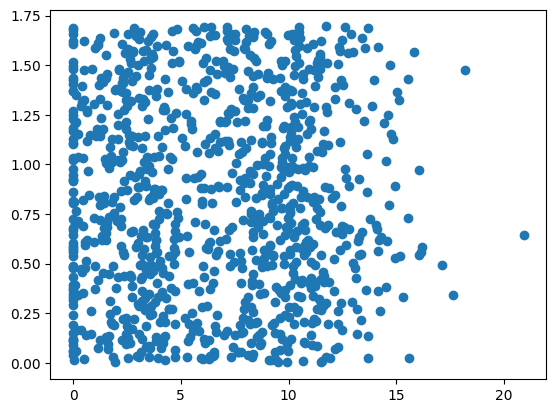

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

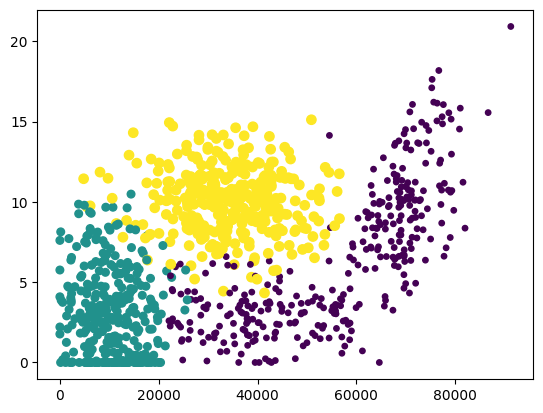

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*array(datingLables), 15.0 * array(datingLables))
plt.show()

In [ ]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals-minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet/tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [35]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [36]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [37]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [38]:
minVals

array([0.      , 0.      , 0.001156])

In [ ]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLables = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m, :], \
                                     datingLables[numTestVecs:m], 3)
        print('the classifier came back with: %d, the real answer is : %d' %(classifierResult, datingLables[i]))
        if (classifierResult != datingLables[i]):
            errorCount+=1.0
    print("the total error rate is: %f" %(errorCount/float(numTestVecs)))

In [45]:
datingClassTest()

the classifier came back with: 3, the real answer is : 3
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 

In [48]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier Miles earned per year?"))
    icecream = float(input("liters of icecream consumed per year?"))
    datingDataMat, datingLables = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inarr = array([ffMiles, percentTats, icecream])
    classifierResult = classify0((inarr-minVals)/ranges, normMat, datingLables, 3)
    print("You will probably like this person:", resultList[classifierResult - 1])

In [49]:
classifyPerson()

You will probably like this person: in small doses


In [55]:
def image2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline().strip()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [57]:
testVector = image2vector('testDigits/0_13.txt')
testVector

array([[0., 0., 0., ..., 0., 0., 0.]])

In [60]:
len(testVector[0])

1024

In [62]:
def handwritingclasstest():
    hwlables = []
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwlables.append(classNumStr)
        trainingMat[i,:] = image2vector('trainingDigits/%s' % fileNameStr)
    testfileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testfileList)
    for i in range(mTest):
        fileNameStr = testfileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = image2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwlables, 3)
        print(f'the classifier came back with:{classifierResult} the real answer is: {classNumStr}')
        if classifierResult != classNumStr:
            errorCount+=1.0
    print(f"The total number of errors is:{errorCount}")
    print(f"The total error rate is: {errorCount/float(mTest)}")


In [63]:
handwritingclasstest()

the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back with:0 the real answer is: 0
the classifier came back wit